<a href="https://colab.research.google.com/github/alexpin/Curso-Python/blob/master/EDA/IFA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalar librerias necesarias

In [1]:
!pip install --upgrade pip
!pip install palmerpenguins==0.1.4 numpy==1.23.4 pandas==1.5.1 seaborn==0.12.1 matplotlib==3.6.0 empiricaldist==0.6.7 statsmodels==0.13.5 scikit-learn==1.1.2 pyjanitor==0.23.1 session-info

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importar librerias necesarias

In [2]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info
import io

Apariencia General de los graficos

In [3]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

Carga de Datos

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Data_ifa.xlsx to Data_ifa.xlsx


In [5]:
df = pd.read_excel(io.BytesIO(uploaded['Data_ifa.xlsx']))
df

,Fecha,Clics,Impresiones,Posición
0,2021-09-29,60,2530,13.56
1,2021-09-30,49,2404,15.56
2,2021-10-01,60,1931,11.72
3,2021-10-02,25,1128,16.96
4,2021-10-03,25,1024,15.44
...,...,...,...,...
482,2023-01-24,53,2066,17.67
483,2023-01-25,51,1964,17.13
484,2023-01-26,40,1984,15.65
485,2023-01-27,27,1789,19.52


Colecta y validación de datos

In [6]:
df.dtypes

Fecha          datetime64[ns]
Clics                   int64
Impresiones             int64
Posición              float64
dtype: object

Variables por tipos de datos

In [7]:
(
    df
    .dtypes
    .value_counts()
)

int64             2
datetime64[ns]    1
float64           1
dtype: int64

Variables y observaciones en el conjunto de datos

In [8]:
df.shape

(487, 4)

Valores nulos en el conjunto de datos

In [9]:
(
    df
    .isnull()
    .any()
)

Fecha          False
Clics          False
Impresiones    False
Posición       False
dtype: bool

Conteos y porciones

Preludio: ¿Qué estadísticos describen el conjunto de datos?

In [10]:
df.describe(include='all')

<ipython-input-10-174ba9bf1a5c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,Fecha,Clics,Impresiones,Posición
count,487,487.000000,487.000000,487.000000
unique,487,NaN,NaN,NaN
top,2021-09-29 00:00:00,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
first,2021-09-29 00:00:00,NaN,NaN,NaN
last,2023-01-28 00:00:00,NaN,NaN,NaN
mean,NaN,36.585216,2062.850103,16.100801
std,NaN,16.925047,656.706892,3.037877
min,NaN,2.000000,729.000000,10.720000
25%,NaN,25.000000,1536.000000,13.955000


Solo *numericas*

In [11]:
df.describe(include=[np.number])

,Clics,Impresiones,Posición
count,487.000000,487.000000,487.000000
mean,36.585216,2062.850103,16.100801
std,16.925047,656.706892,3.037877
min,2.000000,729.000000,10.720000
25%,25.000000,1536.000000,13.955000
50%,33.000000,2053.000000,15.820000
75%,48.000000,2468.000000,17.655000
max,119.000000,3775.000000,31.470000


Medidas de tendencia Central

In [12]:

df.mean()

<ipython-input-12-c61f0c8f89b5>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.mean()


Clics            36.585216
Impresiones    2062.850103
Posición         16.100801
dtype: float64

In [13]:
df.median()

<ipython-input-13-6d467abf240d>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.median()


Clics            33.00
Impresiones    2053.00
Posición         15.82
dtype: float64

In [14]:
df.mode()

,Fecha,Clics,Impresiones,Posición
0,2021-09-29,27.0,1279.0,15.4
1,2021-09-30,NaN,2065.0,15.9
2,2021-10-01,NaN,NaN,NaN
3,2021-10-02,NaN,NaN,NaN
4,2021-10-03,NaN,NaN,NaN
...,...,...,...,...
482,2023-01-24,NaN,NaN,NaN
483,2023-01-25,NaN,NaN,NaN
484,2023-01-26,NaN,NaN,NaN
485,2023-01-27,NaN,NaN,NaN


Medidas de dispersion

¿Cuál es el valor máximo de las variables?

In [15]:
df.max(numeric_only=True)

Clics           119.00
Impresiones    3775.00
Posición         31.47
dtype: float64

¿Cuál es el valor mínimo de las variables?

In [16]:
df.min(numeric_only=True)

Clics            2.00
Impresiones    729.00
Posición        10.72
dtype: float64

¿Cuál es el rango de las variables?

In [17]:
df.max(numeric_only=True) - df.min(numeric_only=True)

Clics           117.00
Impresiones    3046.00
Posición         20.75
dtype: float64

¿Cuál es la desviación estándar de las variables?

In [18]:
df.std()

Fecha          140 days 17:29:50.273867316
Clics                            16.925047
Impresiones                     656.706892
Posición                          3.037877
dtype: object

¿Cuál es el rango intercuartílico?

In [19]:
df.quantile(0.75)

<ipython-input-19-396ba156e02a>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.quantile(0.75)


Clics            48.000
Impresiones    2468.000
Posición         17.655
Name: 0.75, dtype: float64

In [20]:
df.quantile(0.75) - df.quantile(0.25)

<ipython-input-20-a64f21cf6a37>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.quantile(0.75) - df.quantile(0.25)


Clics           23.0
Impresiones    932.0
Posición         3.7
dtype: float64

In [ ]:
(
    df
    .quantile(q=[0.75, 0.50, 0.25])
    .transpose()
    .rename_axis('variable')
    .reset_index()
    .assign(
        iqr=lambda df:df[0.75] - df[0.25]
    )
)

¿Cómo puedo visualizar la distribución de una variable?

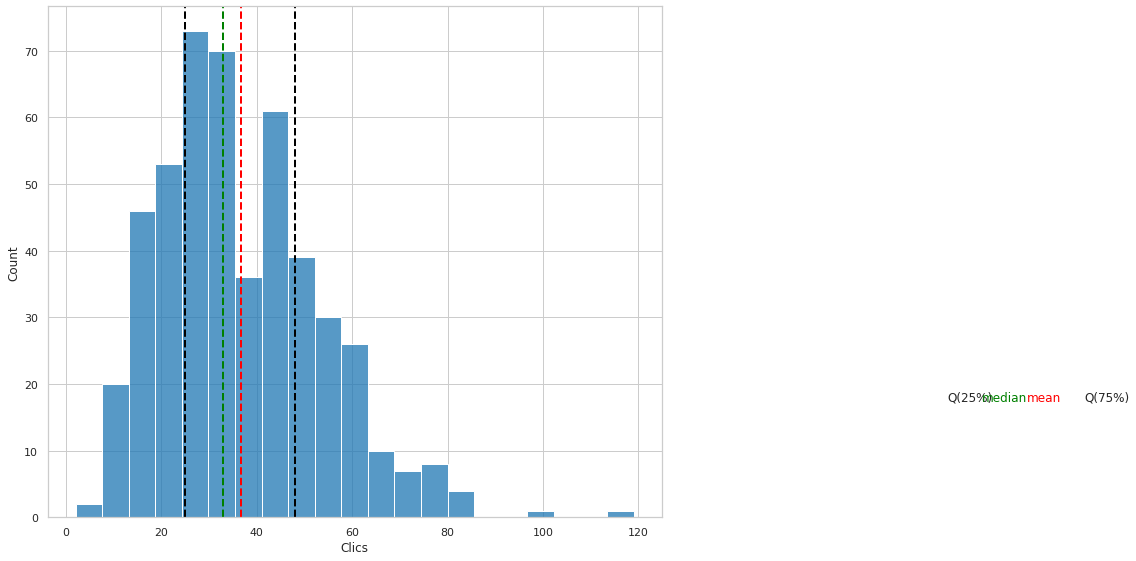

In [22]:
sns.histplot(
    data=df,
    x='Clics'
)
plt.axvline(
    x=df.Clics.mean(),
    color='red',
    linestyle='dashed',
    linewidth=2
)

# Median(Green)
plt.axvline(
    x=df.Clics.median(),
    linestyle="dashed",
    color="g",
    linewidth=2
)

# Q_75(Black)
plt.axvline(
    x=df.Clics.quantile(0.75),
    linestyle="dashed",
    color="k",
    linewidth=2
)

# Q_25(Black)
plt.axvline(
    x=df.Clics.quantile(0.25),
    linestyle="dashed",
    color="k",
    linewidth=2
)
plt.text(184.7,17.5, 'Q(25%)', fontsize=12)
plt.text(192,17.5, 'median', fontsize=12, color='g')
plt.text(201.5,17.5, 'mean', fontsize=12, color='r')
plt.text(213.5,17.5, 'Q(75%)', fontsize=12)

plt.show()

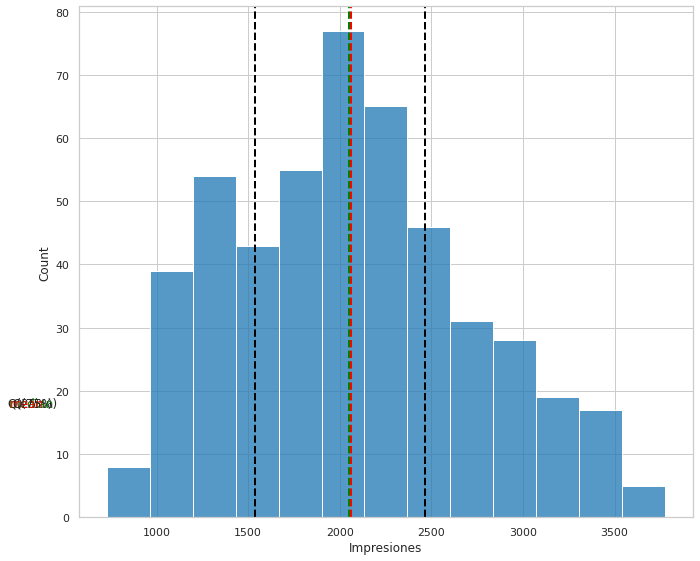

In [23]:
sns.histplot(
    data=df,
    x='Impresiones'
)
plt.axvline(
    x=df.Impresiones.mean(),
    color='red',
    linestyle='dashed',
    linewidth=2
)

# Median(Green)
plt.axvline(
    x=df.Impresiones.median(),
    linestyle="dashed",
    color="g",
    linewidth=2
)

# Q_75(Black)
plt.axvline(
    x=df.Impresiones.quantile(0.75),
    linestyle="dashed",
    color="k",
    linewidth=2
)

# Q_25(Black)
plt.axvline(
    x=df.Impresiones.quantile(0.25),
    linestyle="dashed",
    color="k",
    linewidth=2
)
plt.text(184.7,17.5, 'Q(25%)', fontsize=12)
plt.text(192,17.5, 'median', fontsize=12, color='g')
plt.text(201.5,17.5, 'mean', fontsize=12, color='r')
plt.text(213.5,17.5, 'Q(75%)', fontsize=12)

plt.show()

In [ ]:
sns.histplot(
    data=df,
    x='Posición'
)
plt.axvline(
    x=df.Posición.mean(),
    color='red',
    linestyle='dashed',
    linewidth=2
)

# Median(Green)
plt.axvline(
    x=df.Posición.median(),
    linestyle="dashed",
    color="g",
    linewidth=2
)

# Q_75(Black)
plt.axvline(
    x=df.Posición.quantile(0.75),
    linestyle="dashed",
    color="k",
    linewidth=2
)

# Q_25(Black)
plt.axvline(
    x=df.Posición.quantile(0.25),
    linestyle="dashed",
    color="k",
    linewidth=2
)
plt.text(184.7,17.5, 'Q(25%)', fontsize=12)
plt.text(192,17.5, 'median', fontsize=12, color='g')
plt.text(201.5,17.5, 'mean', fontsize=12, color='r')
plt.text(213.5,17.5, 'Q(75%)', fontsize=12)

plt.show()

Diagrama de caja / boxplot

<AxesSubplot: xlabel='Clics'>

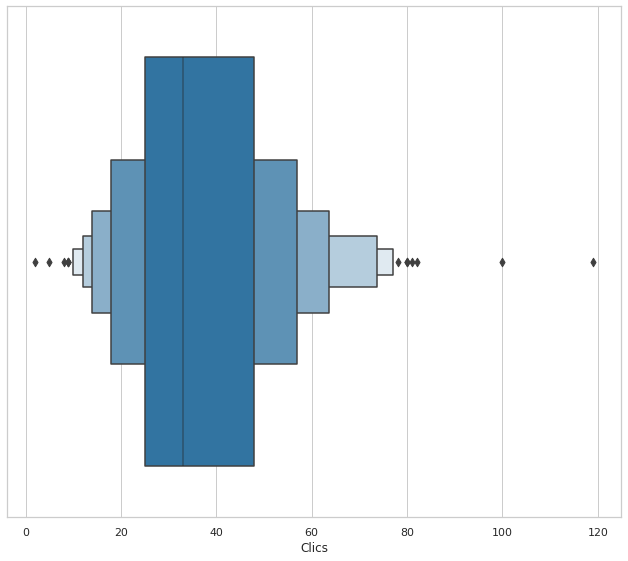

In [ ]:
sns.boxenplot(
    data=df,
    x='Clics'
)

<AxesSubplot: xlabel='Impresiones'>

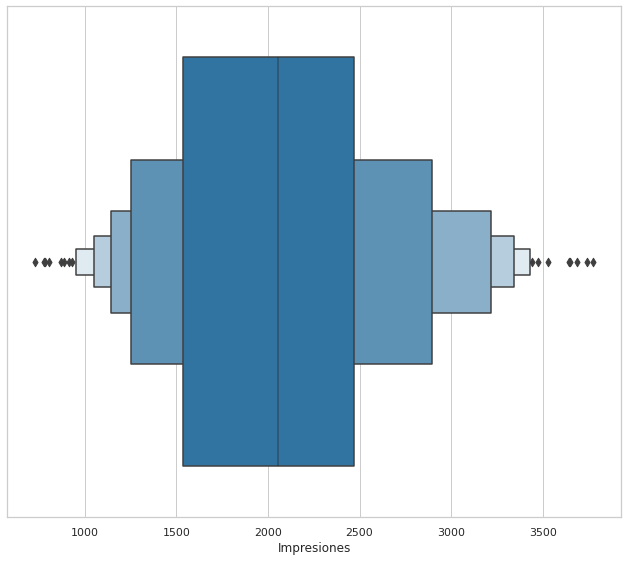

In [25]:
sns.boxenplot(
    data=df,
    x='Impresiones'
)

<AxesSubplot: xlabel='Posición'>

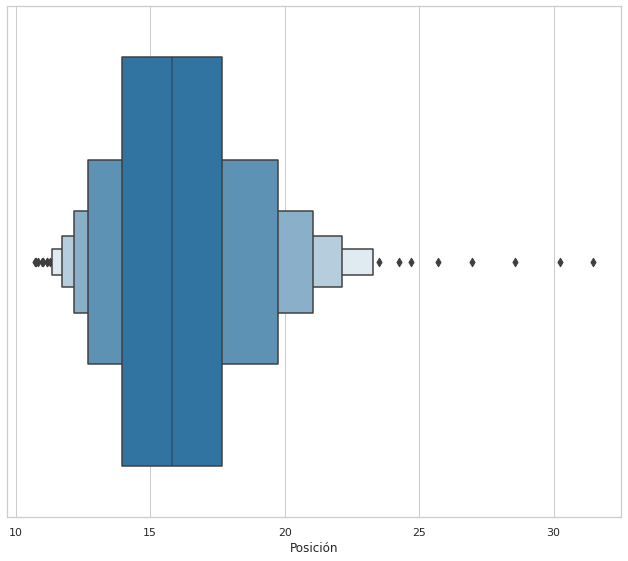

In [26]:
sns.boxenplot(
    data=df,
    x='Posición'
)

Distribuciones: PMFs, CDFs y PDFs
Funciones de probabilidad de masas (PMFs)

<AxesSubplot: xlabel='Clics', ylabel='Probability'>

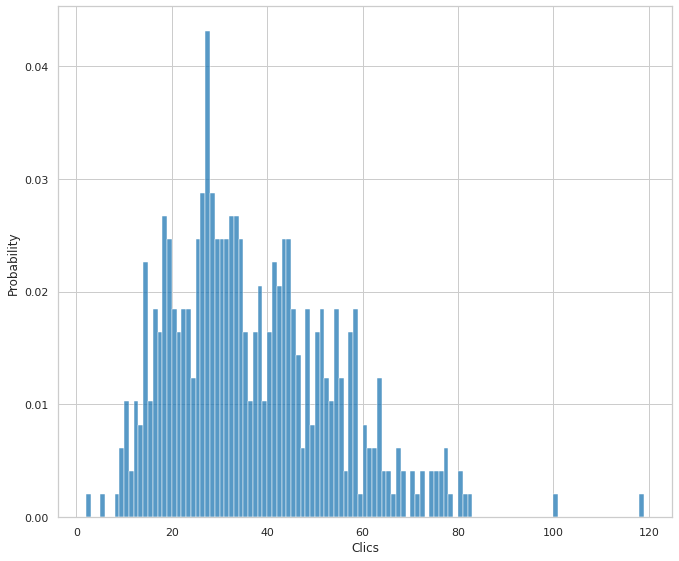

In [27]:
sns.histplot(
    data=df,
    x='Clics',
    binwidth=1,
    stat='probability'
)

<AxesSubplot: xlabel='Impresiones', ylabel='Probability'>

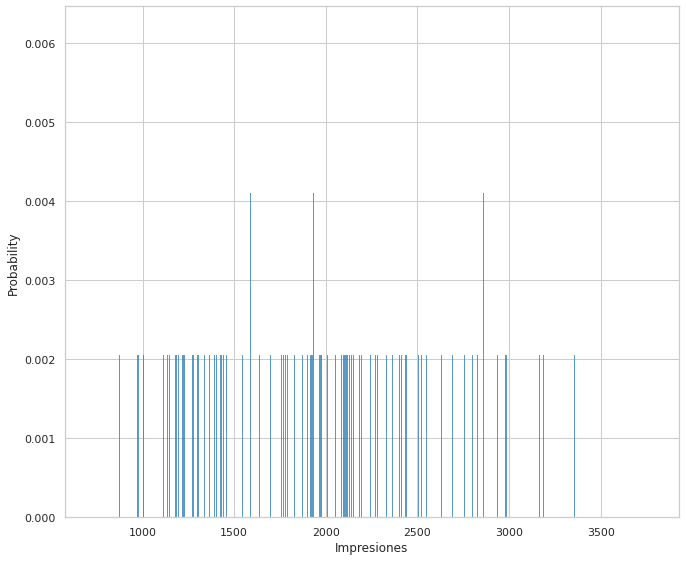

In [28]:
sns.histplot(
    data=df,
    x='Impresiones',
    binwidth=1,
    stat='probability'
)

<AxesSubplot: xlabel='Posición', ylabel='Probability'>

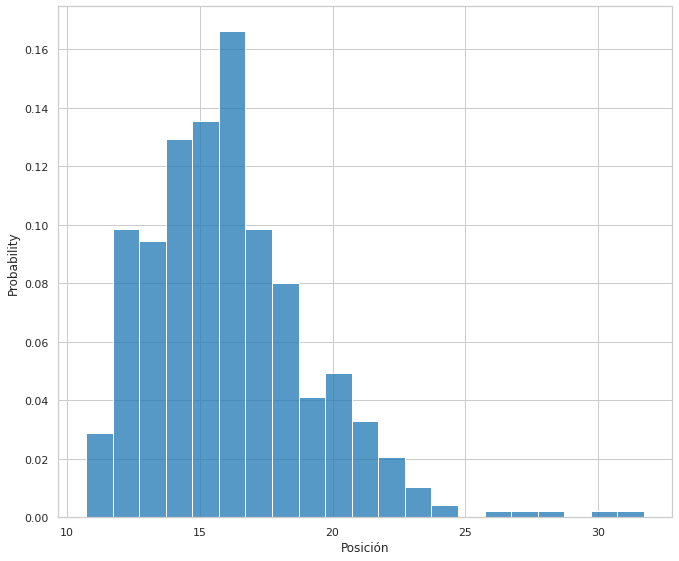

In [29]:
sns.histplot(
    data=df,
    x='Posición',
    binwidth=1,
    stat='probability'
)

Utilizando empiricaldist

In [30]:
pmf_Clics = empiricaldist.Pmf.from_seq(
    df.Clics,
    normalize=True
)

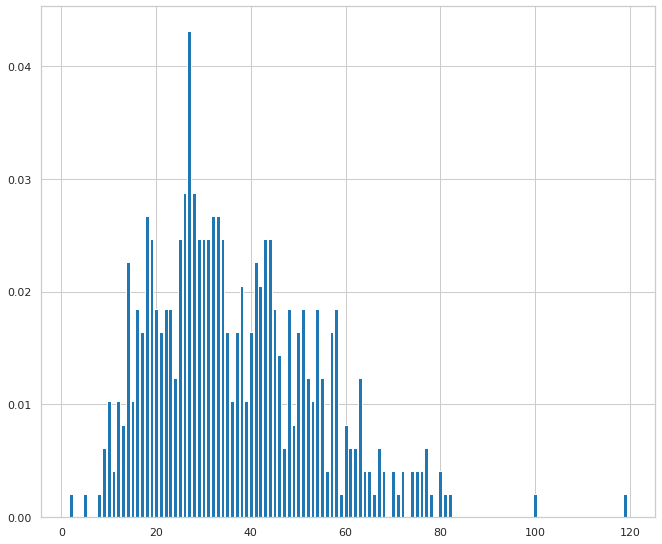

In [31]:
pmf_Clics.bar()

In [32]:
pmf_Clics(27)

0.043121149897330596

In [33]:
df.Clics.max()

119

In [34]:
df.Clics.min()

2

Funciones empirícas de probabilidad acumulada (ECDFs)

<AxesSubplot: xlabel='Clics', ylabel='Proportion'>

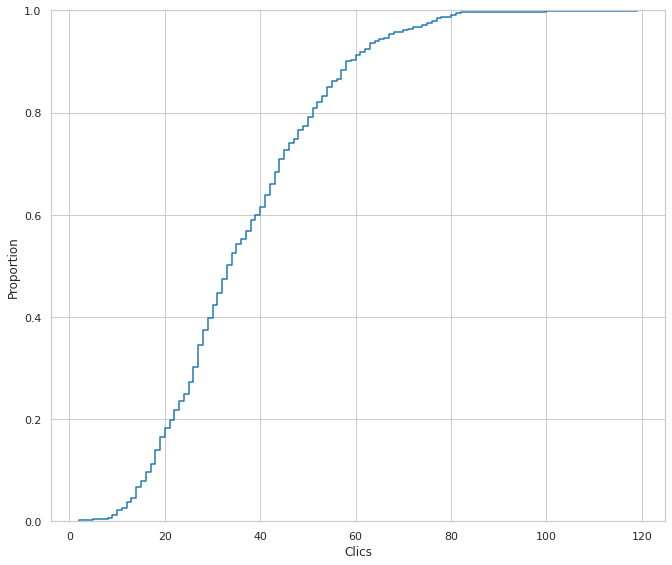

In [35]:
sns.ecdfplot(
    data=df,
    x='Clics'
)

<AxesSubplot: xlabel='Impresiones', ylabel='Proportion'>

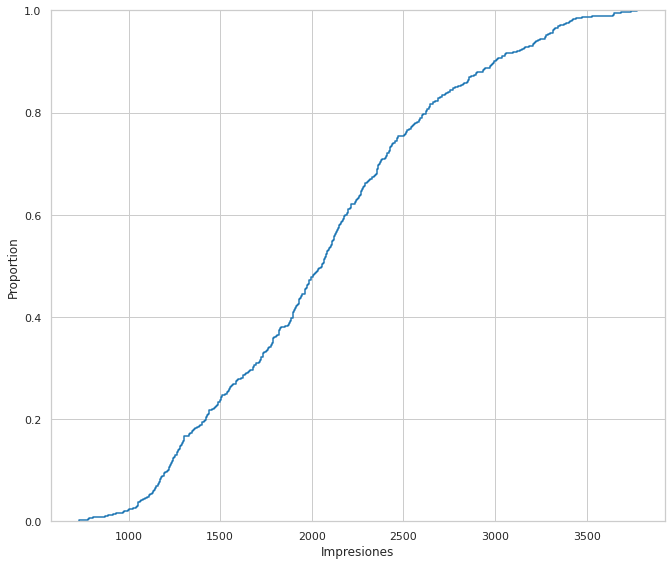

In [36]:
sns.ecdfplot(
    data=df,
    x='Impresiones'
)

<AxesSubplot: xlabel='Posición', ylabel='Proportion'>

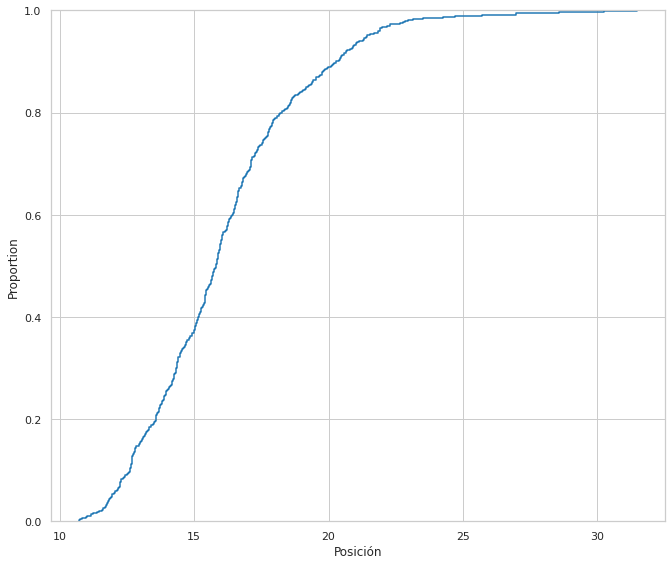

In [37]:
sns.ecdfplot(
    data=df,
    x='Posición'
)

Utilizando empiricaldist

In [38]:

cdf_Clics = empiricaldist.Cdf.from_seq(
    df.Clics,
    normalize=True
)

40 0.6160164271047228


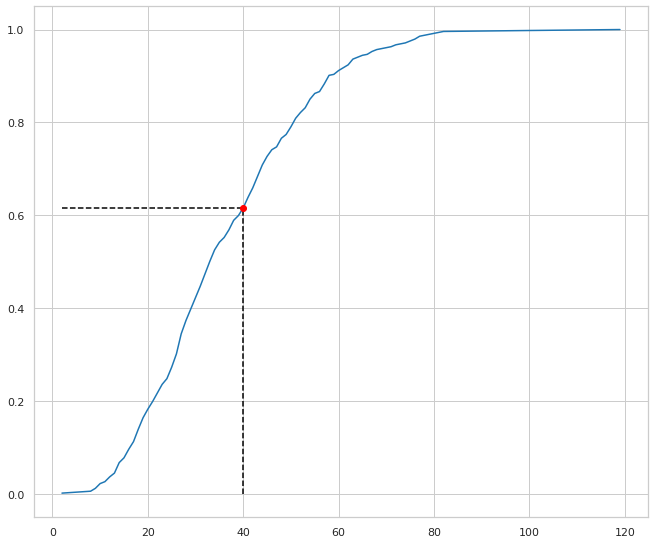

In [39]:
cdf_Clics.plot()
q=40
p=cdf_Clics.forward(q)
print(q, p)

plt.vlines(
    x=q,
    ymin=0,
    ymax=p,
    color='black',
    linestyle='dashed'
)

plt.hlines(
    y=p,
    xmin=pmf_Clics.qs[0],
    xmax=q,
    color='black',
    linestyle='dashed'
)

plt.plot(q,p, 'ro')

In [40]:
pmf_Posicion = empiricaldist.Pmf.from_seq(
    df.Posición,
    normalize=True
)

In [42]:
cdf_Posición = empiricaldist.Cdf.from_seq(
    df.Clics,
    normalize=True
)

16 0.09650924024640657


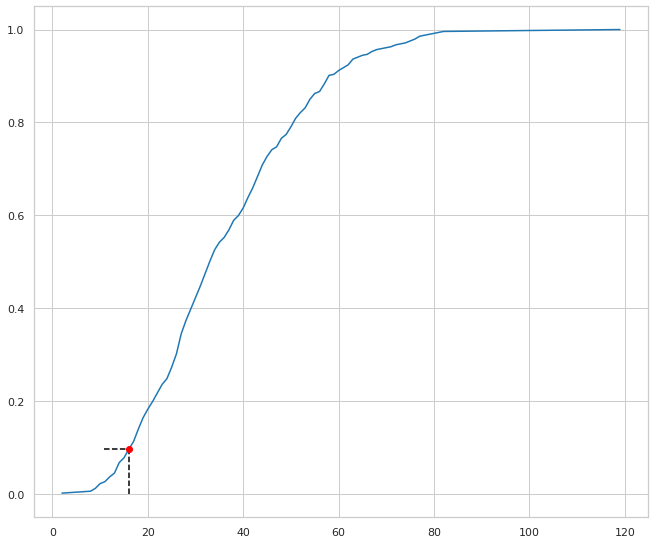

In [43]:
cdf_Posición.plot()
q=16
p=cdf_Posición.forward(q)
print(q, p)

plt.vlines(
    x=q,
    ymin=0,
    ymax=p,
    color='black',
    linestyle='dashed'
)

plt.hlines(
    y=p,
    xmin=pmf_Posicion.qs[0],
    xmax=q,
    color='black',
    linestyle='dashed'
)

plt.plot(q,p, 'ro')

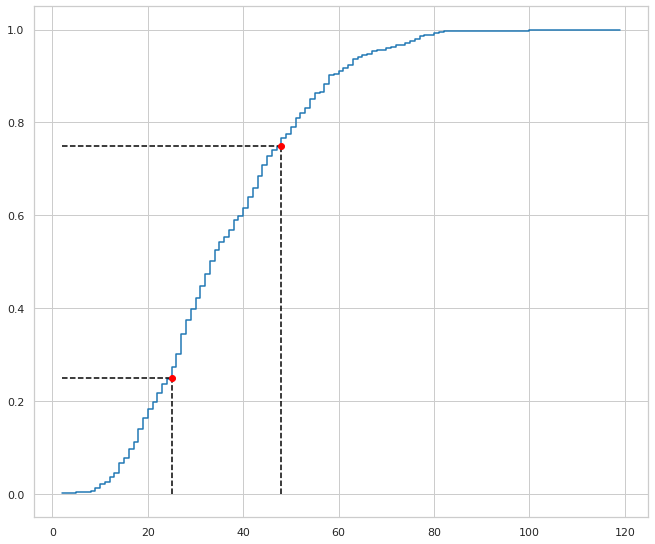

In [44]:
cdf_Clics.step ( )
#p_1 = 8.25 # Specify probability
#P_2 = 8.75
ps = ( 0.25 , 0.75 ) # IQR
qs = cdf_Clics.inverse(ps)
plt.vlines (
    x = qs,
    ymin = 0,
    ymax=ps,
    color='black',
    linestyle='dashed'
)

plt.hlines(
   y=ps,
   xmin=pmf_Clics.qs[0],
   xmax=qs,
   color='black',
   linestyle='dashed'
)

plt.scatter(
   x=qs,
   y=ps,
   color='red',
   zorder=2
)

Funciones de densidad de probabilidad

<AxesSubplot: xlabel='Clics', ylabel='Density'>

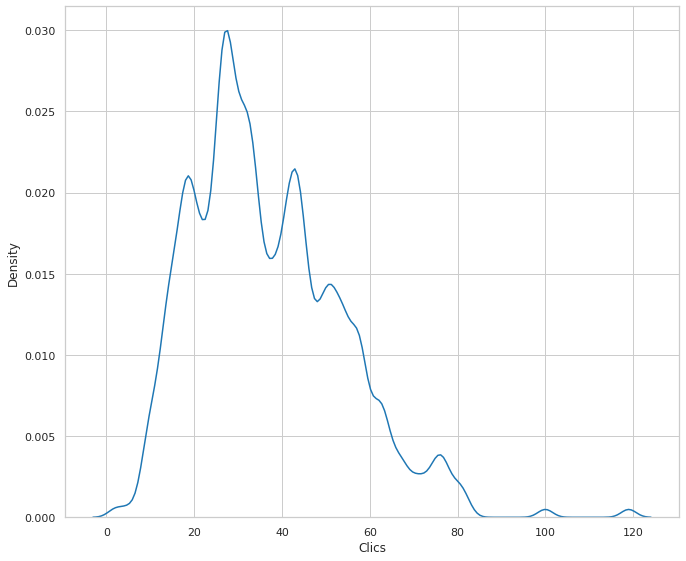

In [45]:
sns.kdeplot(
    data=df,
    x='Clics',
    bw_method=0.1
)

<AxesSubplot: xlabel='Impresiones', ylabel='Density'>

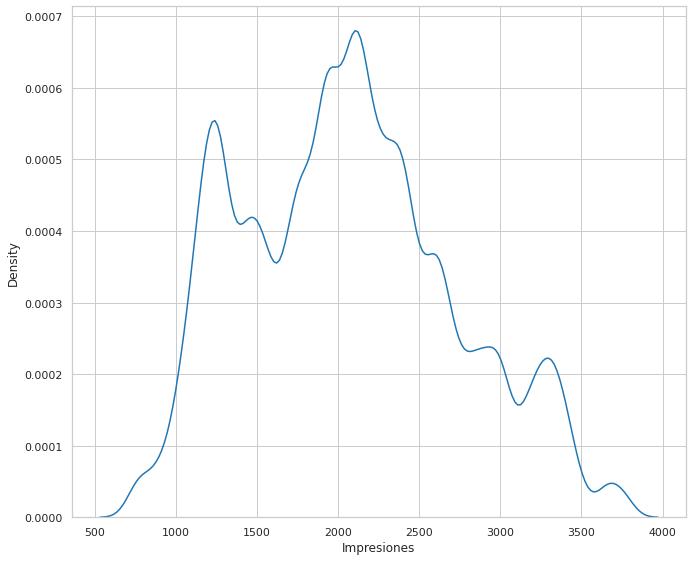

In [46]:
sns.kdeplot(
    data=df,
    x='Impresiones',
    bw_method=0.1
)

<AxesSubplot: xlabel='Posición', ylabel='Density'>

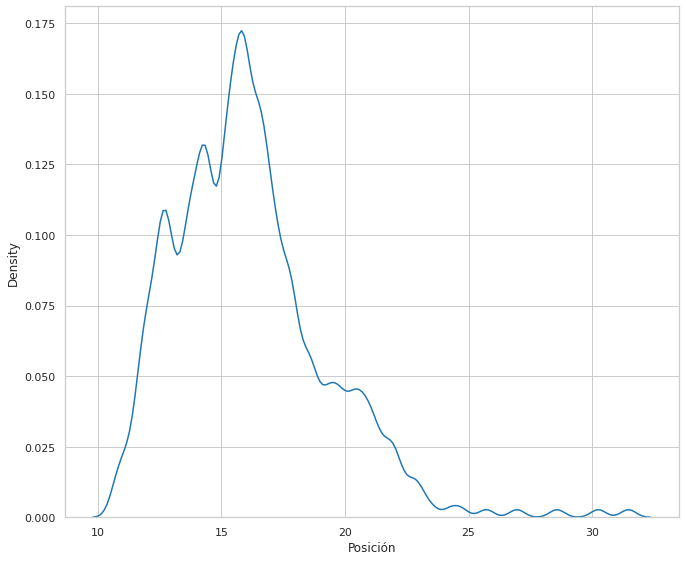

In [47]:
sns.kdeplot(
    data=df,
    x='Posición',
    bw_method=0.1
)

In [48]:
stats = df.Posición.describe()
stats

count    487.000000
mean      16.100801
std        3.037877
min       10.720000
25%       13.955000
50%       15.820000
75%       17.655000
max       31.470000
Name: Posición, dtype: float64

<AxesSubplot: >

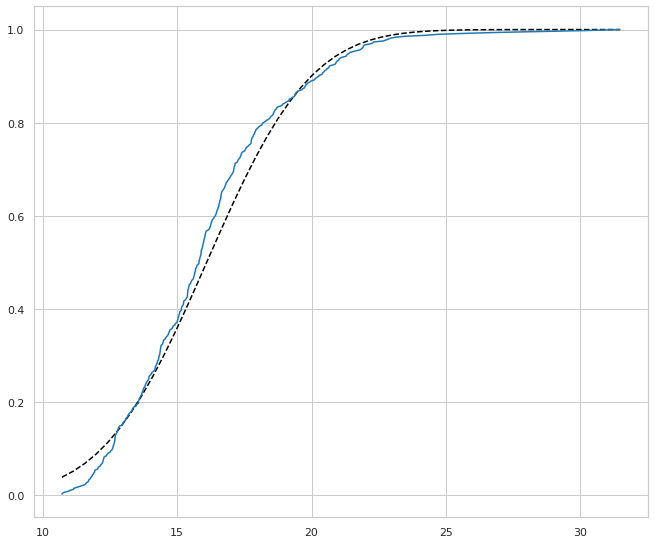

In [49]:
xs = np.linspace(stats['min'], stats['max'])
ys = scipy.stats.norm(stats['mean'], stats['std']).cdf(xs)

plt.plot(xs, ys, color='black', linestyle='dashed')

empiricaldist.Cdf.from_seq(
    df.Posición,
    normalize=True
).plot()

<AxesSubplot: xlabel='Posición', ylabel='Density'>

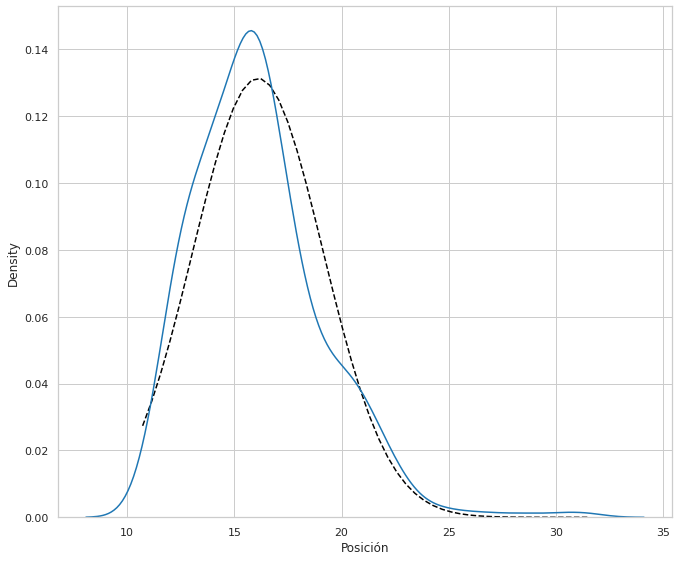

In [50]:
xs = np.linspace(stats['min'], stats['max'])
ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs)

plt.plot(xs, ys, color='black', linestyle='dashed')

sns.kdeplot(
    data=df,
    x='Posición'

)

Estableciendo relaciones: Gráfica de puntos

<AxesSubplot: xlabel='Impresiones', ylabel='Clics'>

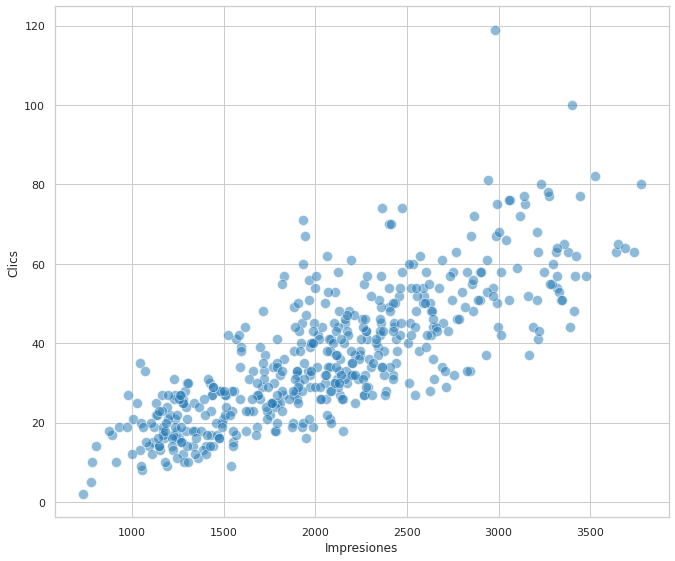

In [51]:
sns.scatterplot(
    data= df,
    x='Impresiones',
    y='Clics',
    alpha=1/2,
    s=100
)

<AxesSubplot: xlabel='Clics', ylabel='Posición'>

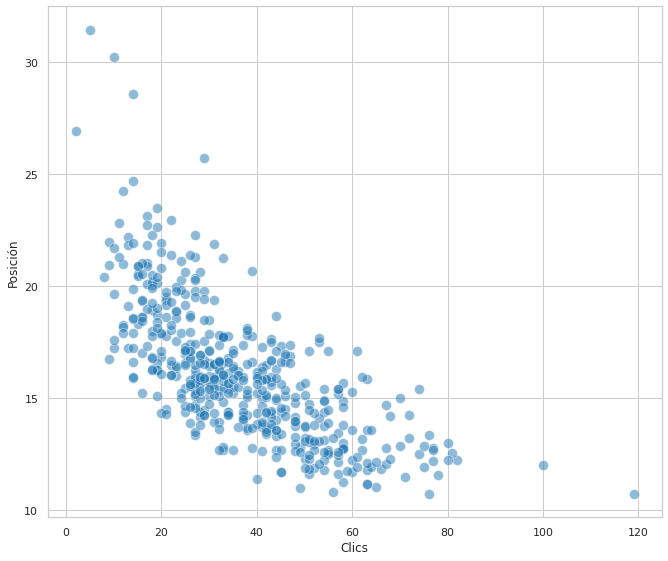

In [52]:
sns.scatterplot(
    data= df,
    x='Clics',
    y='Posición',
    alpha=1/2,
    s=100
)

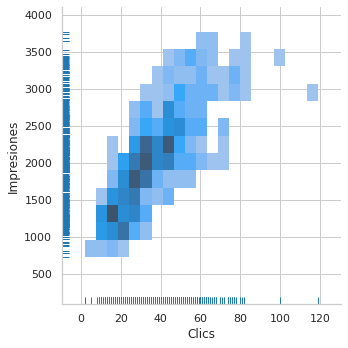

In [53]:
sns.displot(
    df,
    x='Clics',
    y='Impresiones',
    rug=True
)
   

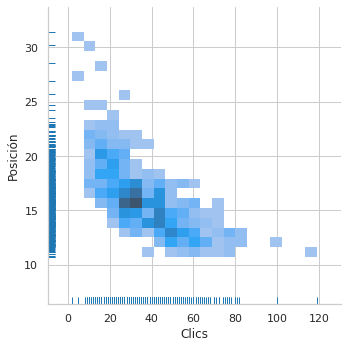

In [54]:
sns.displot(
    df,
    x='Clics',
    y='Posición',
    rug=True
)

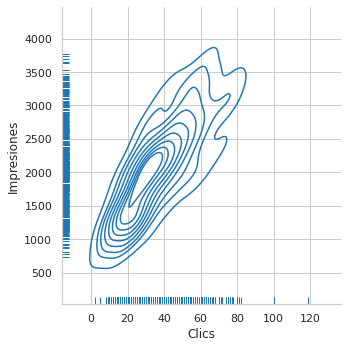

In [56]:
sns.displot(
    df,
    x='Clics',
    y='Impresiones',
    rug=True,
    kind='kde'
)

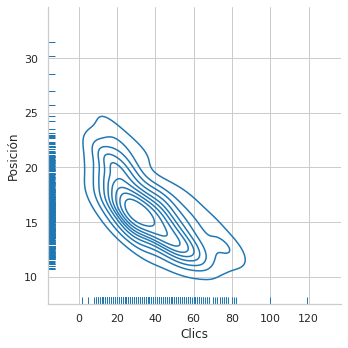

In [57]:
sns.displot(
    df,
    x='Clics',
    y='Posición',
    rug=True,
    kind='kde'
)

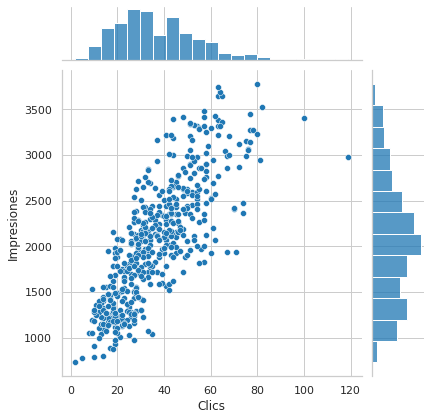

In [58]:
sns.jointplot(
    data=df,
    x='Clics',
    y='Impresiones',
)

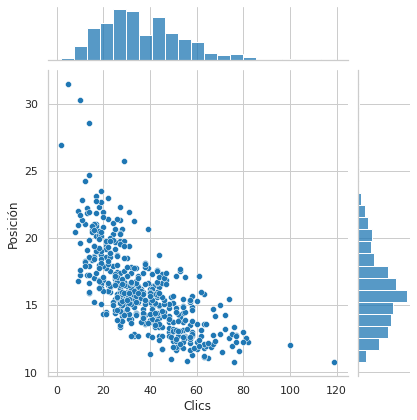

In [59]:
sns.jointplot(
    data=df,
    x='Clics',
    y='Posición',
)

Estableciendo relaciones: Matrices de correlación
¿Existe una correlación lineal entre alguna de nuestras variables?

In [62]:
df.corr()

<ipython-input-62-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Clics,Impresiones,Posición
Clics,1.000000,0.794694,-0.705874
Impresiones,0.794694,1.000000,-0.764873
Posición,-0.705874,-0.764873,1.000000


<ipython-input-63-58ba57a1b073>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=df.corr(),


<AxesSubplot: >

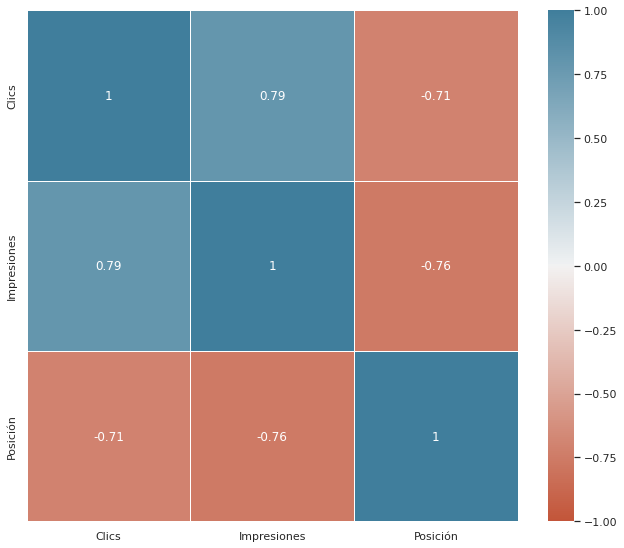

In [63]:

sns.heatmap(
    data=df.corr(),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True

)

<ipython-input-64-b077bf49c799>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=df.corr(),


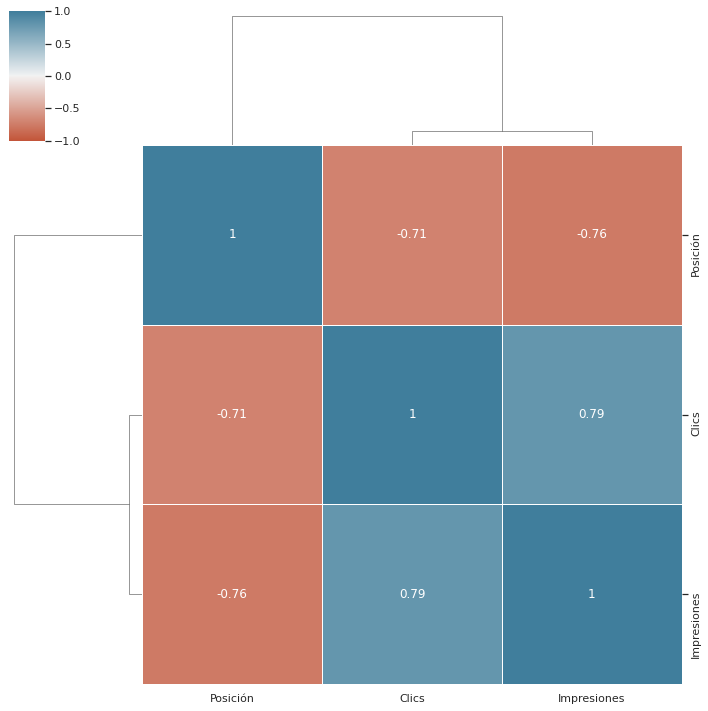

In [64]:
sns.clustermap(
    data=df.corr(),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True

)
     

<AxesSubplot: xlabel='Clics', ylabel='Impresiones'>

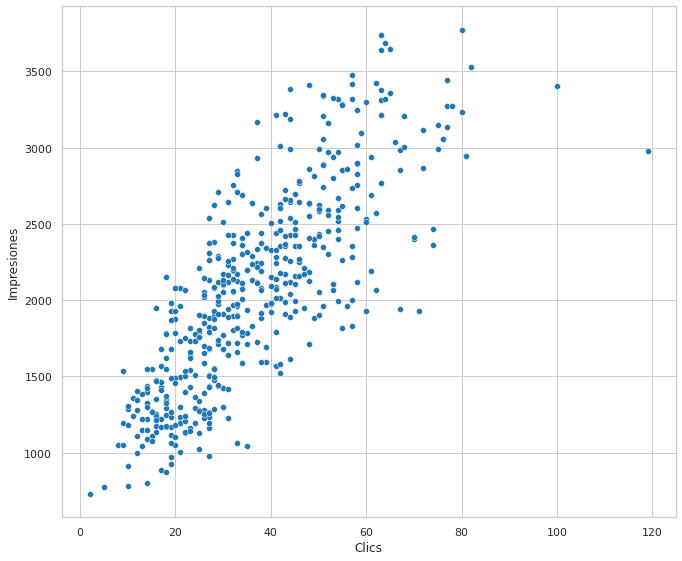

In [66]:
sns.scatterplot(
    data=df,
    x='Clics',
    y='Impresiones'
)

Estableciendo relaciones: Análisis de regresión simple

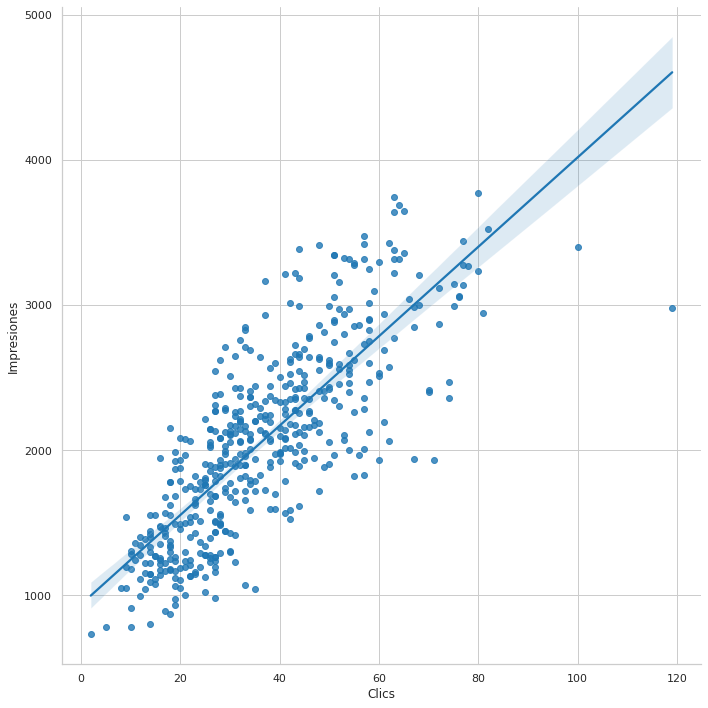

In [68]:
sns.lmplot(
    data=df,
    x='Clics',
    y='Impresiones',
    height=10

)
    

In [70]:
x=df.Clics
y=df.Impresiones

res_x_y= scipy.stats.linregress(x=x, y=y)
res_y_x= scipy.stats.linregress(x=y, y=x)

print(res_x_y, res_y_x, sep='\n')

LinregressResult(slope=30.834828369095984, intercept=934.751258619747, rvalue=0.7946938547558512, pvalue=3.2230381849587044e-107, stderr=1.069465979135132, intercept_stderr=43.10288920776317)
LinregressResult(slope=0.020481330890742663, intercept=-5.6646999250250545, rvalue=0.7946938547558512, pvalue=3.2230381849587044e-107, stderr=0.0007103683643983555, intercept_stderr=1.5377020490823563)


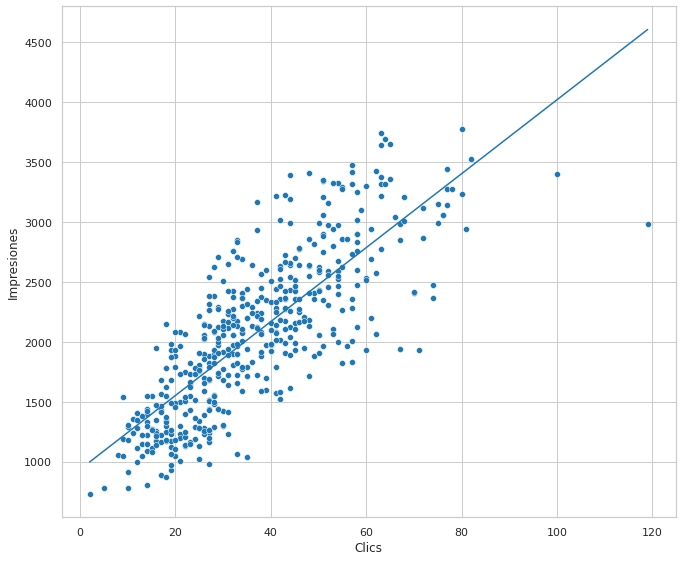

In [71]:
sns.scatterplot(
x=x,
y=y
)

fx_1= np.array([x.min(), x.max()])
fy_1= res_x_y.intercept + res_x_y.slope * fx_1

plt.plot(fx_1, fy_1)

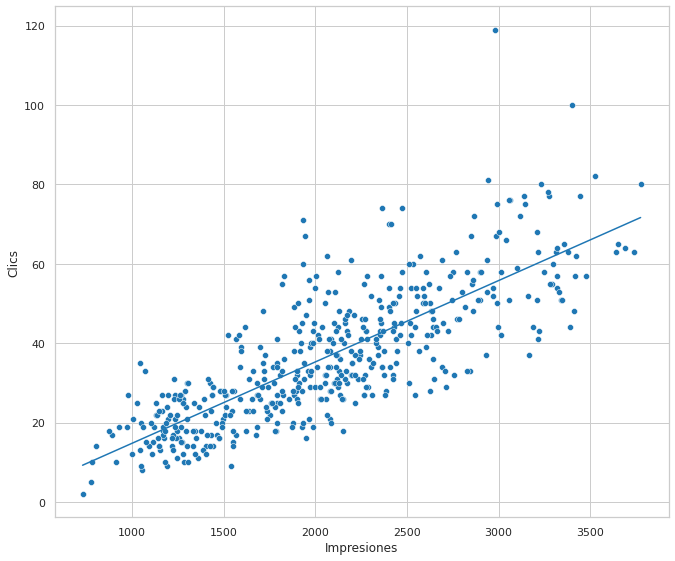

In [72]:
sns.scatterplot(
x=y,
y=x
)

fx_2= np.array([y.min(), y.max()])
fy_2= res_y_x.intercept + res_y_x.slope * fx_2

plt.plot(fx_2, fy_2)

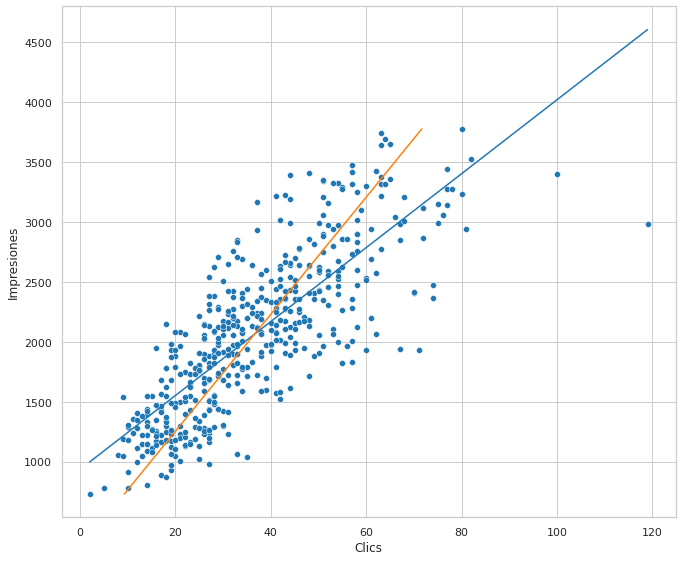

In [73]:
sns.scatterplot(
x=x,
y=y
)
plt.plot(fx_1, fy_1)
plt.plot(fy_2, fx_2)

La regresión no nos dice nada sobre la causalidad, pero existen herramientas para separar las relaciones entre múltiples variables

In [74]:
(
    smf.ols(
        formula='Clics ~ Impresiones',
        data=df
    )
    .fit()
    .params
)

Intercept     -5.664700
Impresiones    0.020481
dtype: float64

In [75]:
(
    smf.ols(
        formula='Impresiones ~ Clics',
        data=df
    )
    .fit()
    .params
)

Intercept    934.751259
Clics         30.834828
dtype: float64